# Outlier detection and removal using z-score and standard deviation in python pandas

In [34]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [35]:
df = pd.read_csv("HR_Employee_Attrition_Dataset.csv")
df.sample(5)

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2181,2182,Yes,29,Travel_Rarely,906,Research & Development,10,3,Life Sciences,4,...,3,80,0,3,5,3,0,0,0,0
2777,2778,No,28,Travel_Rarely,1217,Research & Development,1,3,Medical,3,...,3,80,1,3,3,3,3,2,1,2
1672,1673,No,34,Travel_Frequently,878,Research & Development,10,4,Medical,4,...,4,80,1,5,4,4,5,3,2,0
2089,2090,No,33,Travel_Rarely,586,Sales,1,3,Medical,1,...,1,80,1,9,5,3,9,8,0,8
2559,2560,No,37,Travel_Rarely,674,Research & Development,13,3,Medical,1,...,1,80,0,10,2,3,10,8,3,7


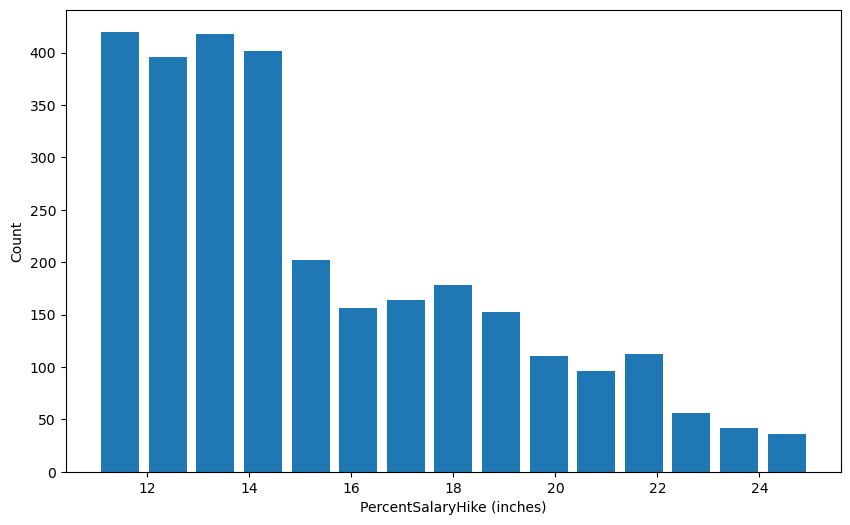

In [36]:
plt.hist(df.PercentSalaryHike, bins=15, rwidth=0.8)
plt.xlabel('PercentSalaryHike (inches)')
plt.ylabel('Count')
plt.show()

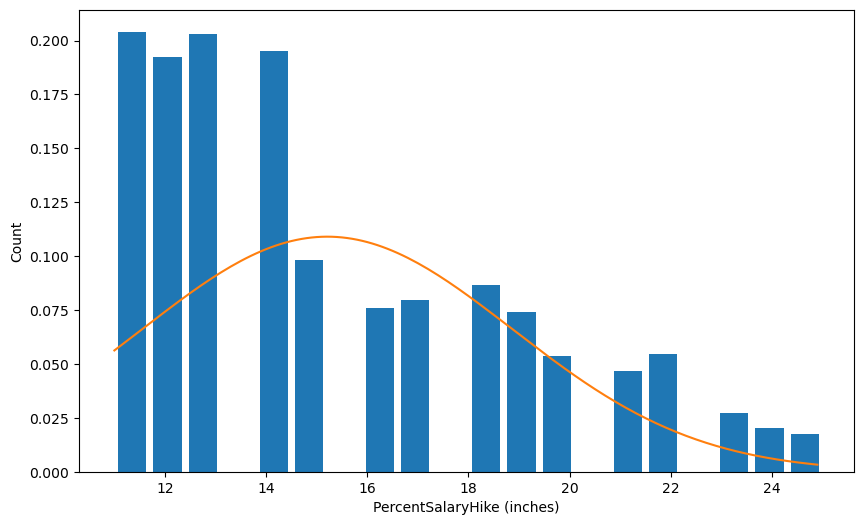

In [37]:
from scipy.stats import norm
import numpy as np
plt.hist(df.PercentSalaryHike, bins=20, rwidth=0.8, density=True)
plt.xlabel('PercentSalaryHike (inches)')
plt.ylabel('Count')

rng = np.arange(df.PercentSalaryHike.min(), df.PercentSalaryHike.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.PercentSalaryHike.mean(),df.PercentSalaryHike.std()))

In [38]:
df.PercentSalaryHike.mean()

15.209523809523809

In [39]:
df.PercentSalaryHike.std()

3.6593150133932086

# Outlier detection and removal using 3 standard deviation

In [40]:
upper_limit = df.PercentSalaryHike.mean() + 3*df.PercentSalaryHike.std()
upper_limit

26.187468849703436

In [41]:
lower_limit = df.PercentSalaryHike.mean() -3*df.PercentSalaryHike.std()
lower_limit

4.231578769344182

In [42]:
df[(df.PercentSalaryHike>upper_limit) | (df.PercentSalaryHike<lower_limit)]

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**Now remove these outliers and generate new dataframe**

In [43]:
df_no_outlier_std_dev = df[(df.PercentSalaryHike<upper_limit) & (df.PercentSalaryHike>lower_limit)]
df_no_outlier_std_dev.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [44]:
df_no_outlier_std_dev.shape

(2940, 34)

In [45]:
df.shape

(2940, 34)

# Outlier detection and removal using Z Score

**Calculate the Z Score**

In [46]:
df['zscore'] = ( df.PercentSalaryHike - df.PercentSalaryHike.mean() ) / df.PercentSalaryHike.std()
df.head(5)

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,80,0,8,0,1,6,4,0,5,-1.150358
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,80,1,10,3,3,10,7,1,7,2.128944
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,80,0,7,3,3,0,0,0,0,-0.057258
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,80,0,8,3,3,8,7,3,0,-1.150358
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80,1,6,3,3,2,2,2,2,-0.877083


In [47]:
(11-15.2)/3.6

-1.1666666666666665

In [48]:
df[df['zscore']>3]

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore


In [49]:
df[df['zscore']<-3]

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore


In [50]:
df[(df.zscore<-3) | (df.zscore>3)]

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore


# Remove the outliers and produce new dataframe

In [51]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,80,0,8,0,1,6,4,0,5,-1.150358
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,80,1,10,3,3,10,7,1,7,2.128944
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,80,0,7,3,3,0,0,0,0,-0.057258
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,80,0,8,3,3,8,7,3,0,-1.150358
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80,1,6,3,3,2,2,2,2,-0.877083


In [52]:
df_no_outliers.shape

(2940, 35)

In [53]:
df.shape

(2940, 35)